In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
#Add overweight column
df['weight'] / ((df['height'] *0.01)**2)
df['overweight'] =np.where(df['weight'] / ((df['height'] *0.01)**2) > 25, 1, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
#Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] =np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] =np.where(df['gluc'] == 1, 0, 1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


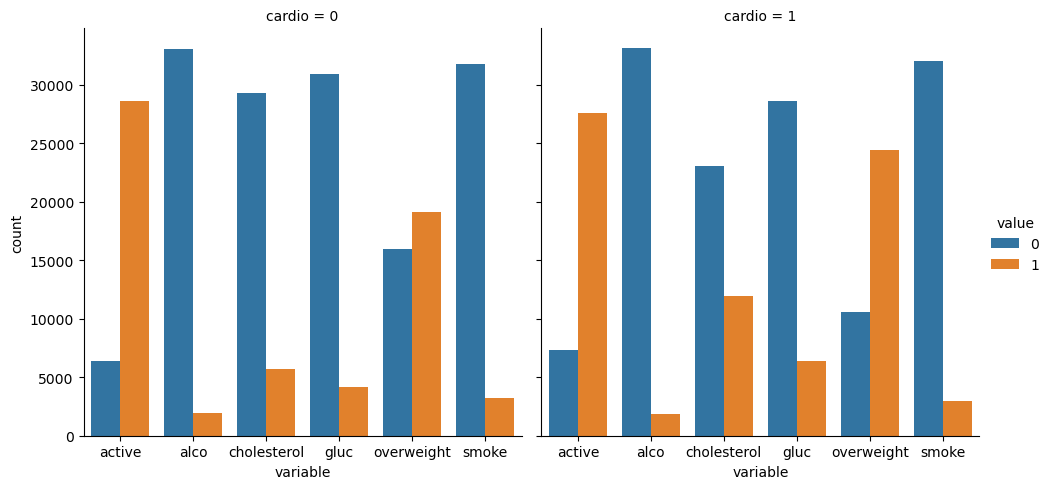

In [6]:
#catplot
df_cat = sorted(['cholesterol','gluc','smoke','alco','active','cardio','overweight'])
df_cat = pd.melt(df, id_vars='cardio', value_vars=df_cat)
sns.catplot(x = 'variable', col='cardio', hue='value', kind='count', data=df_cat)

In [7]:
df_heat = df.loc[(df['ap_lo'] <= df['ap_hi'])&
(df['height'] >= df['height'].quantile(0.025))&
(df['height'] <= df['height'].quantile(0.975))&
(df['weight'] >= df['weight'].quantile(0.025))&
(df['weight'] <= df['weight'].quantile(0.975))]

In [8]:
corr =df_heat.corr()(method="pearson")

In [9]:
mask = np.triu(corr)

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, linewidths=1, annot=True, square=True, mask=mask, fmt=".1f", center=0.08, cbar_kws = {"shrink":0.5})

In [16]:
fig.savefig('heatmap.png')